# 机器学习纳米学位
## 监督学习
## 项目2: 为*CharityML*寻找捐献者

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

----
## 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))
data.tail()##

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


### 练习：数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [2]:
# TODO：总的记录数
n_records = data.shape[0]

# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = n_records - n_greater_50k #data[data['income'] == '<=50K'].shape[0]

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = n_greater_50k / n_records *100.0

# 打印结果
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 获得特征和标签
`income` 列是我们需要的标签，记录一个人的年收入是否高于50K。 因此我们应该把他从数据中剥离出来，单独存放。

In [3]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地规一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

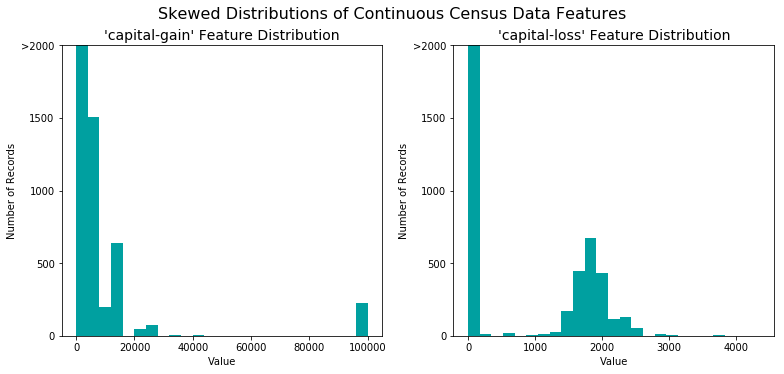

In [4]:
# 可视化 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw)

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

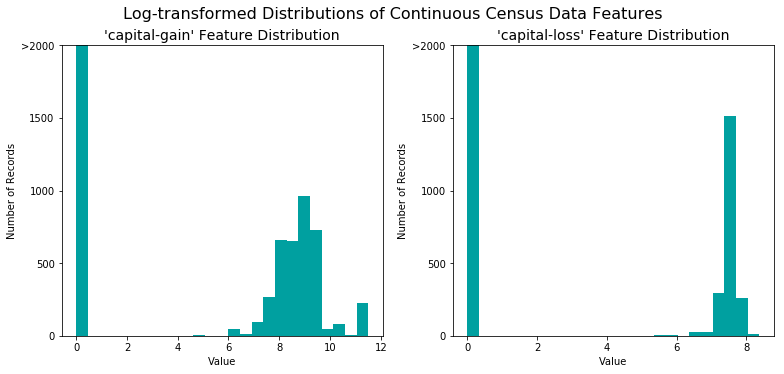

In [5]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw, transformed = True)

### 规一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，规一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来规一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 2))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States


### 练习：数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
   - 将"<=50K"转换成`0`；将">50K"转换成`1`。

In [7]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# TODO：将'income_raw'编码成数字值 ##!!特征上面做独热编码，不是在标签上也要做
income = pd.get_dummies(income_raw)['>50K']


# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

#移除下面一行的注释以观察编码的特征名字
print (encoded)
print(income)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

运行下面的代码单元来完成切分。

In [8]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0,
                                                    stratify = income)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 28941 samples.
Validation set has 7236 samples.
Testing set has 9045 samples.


----
## 评价模型性能
在这一部分中，我们将尝试四种不同的算法，并确定哪一个能够最好地建模数据。四种算法包含一个*天真的预测器* 和三个你选择的监督学习器。

### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

### 问题 1 - 天真的预测器的性能

通过查看收入超过和不超过 \$50,000 的人数，我们能发现多数被调查者年收入没有超过 \$50,000。如果我们简单地预测说*“这个人的收入没有超过 \$50,000”*，我们就可以得到一个 准确率超过 50% 的预测。这样我们甚至不用看数据就能做到一个准确率超过 50%。这样一个预测被称作是天真的。通常对数据使用一个*天真的预测器*是十分重要的，这样能够帮助建立一个模型表现是否好的基准。 使用下面的代码单元计算天真的预测器的相关性能。将你的计算结果赋值给`'accuracy'`, `‘precision’`, `‘recall’` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

*如果我们选择一个无论什么情况都预测被调查者年收入大于 \$50,000 的模型，那么这个模型在**验证集上**的准确率，查准率，查全率和 F-score是多少？*  


这个模型在验证集上的准确率是1.0，查准率是0.5，查全率是1，F-score是0.556.

In [9]:
#不能使用scikit-learn，你需要根据公式自己实现相关计算。
#验证集 y_val
TP = len(y_val[y_val == 1])
FP = len(y_val[y_val == 0])
FN = 0

#TODO： 计算准确率  正确预测的数量与预测总数（测试数据点的数量）之比。
accuracy = float(len(y_val[y_val == 1])) / len(y_val)

# TODO： 计算查准率 Precision  真正例与所有正例之比
precision = TP / (TP+FP)

# TODO： 计算查全率 Recall
recall = TP / (TP+FN)

# TODO： 使用上面的公式，设置beta=0.5，计算F-score
fscore = (1+0.5**2)* ( (precision*recall) / (0.5**2*precision + recall) )


# 打印结果
print ("Naive Predictor on validation data: \n \
    Accuracy score: {:.4f} \n \
    Precision: {:.4f} \n \
    Recall: {:.4f} \n \
    F-score: {:.4f}".format(accuracy, precision, recall, fscore))

Naive Predictor on validation data: 
     Accuracy score: 0.2478 
     Precision: 0.2478 
     Recall: 1.0000 
     F-score: 0.2917


https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

**真阳性（TP）** - 这些是正确预测的正值，这意味着实际类的值为是，预测类的值也为是。

**真阴性（TN）** - 这些是正确预测的负值，这意味着实际类的值为否，预测类的值也为否。例如，如果实际的班级说这名乘客没有生存，预测班级告诉你同样的事情。

**假阳性和假阴性**，当您的实际类与预测类相矛盾时，会出现这些值。

**假阳性（FP）** - 误报，当实际类为否且预测类为是时。

**假阴性（FN）** - 漏报，当实际的类是肯定但是预测的类没有。

——————————

**准确性(Accuracy)** - 准确性是最直观的性能指标，它只是**正确预测的观察与总观察的比率**。有人可能会认为，如果我们有高精度，那么我们的模型是最好的。是的，精确度是一个很好的衡量标准，但只有当您拥有对称数据集时，误报和漏报的值几乎相同。因此，您必须查看其他参数以评估模型的性能。对于我们的模型，我们得到0.803，这意味着我们的模型是约。80％准确。
Accuracy = TP + TN / TP + FP + FN + TN

**精确度(Precision)** - 精确度是**正确预测的阳性观察值与总预测阳性观察值的比率**。这个指标回答的问题是所有被标记为幸存的乘客，有多少人幸免于难？高精度涉及低误报率。我们有0.788精度，这是相当不错的。
精度= TP / TP + FP

**召回（Recall,敏感度Sensitivity）** - 召回是**正确预测的阳性观察与实际班级中所有观察的比率** - 是。回答的问题是：在真正幸存的所有乘客中，我们标记了多少？我们已经召回了0.631，这对于这款车型来说是好的，因为它高于0.5。
召回= TP / TP + FN

**F1得分** - F1得分是Precision和Recall的加权平均值。因此，该分数考虑了误报和漏报。直觉上它并不像准确性那么容易理解，但F1通常比准确性更有用，特别是如果你有不均匀的类分布。如果误报和漏报具有相似的成本，则准确性最佳。如果误报和漏报的成本非常不同，那么最好同时看看Precision和Recall。在我们的例子中，F1得分为0.701。
F1分数= 2 *（召回*精确度）/（召回+精确度）
因此，无论何时构建模型，本文都应该帮助您弄清楚这些参数的含义以及模型的执行情况。

## 监督学习模型
### 问题 2 - 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）

从上面的监督学习模型中选择三个适合我们这个问题的模型，并回答相应问题。

### 模型1

**模型名称**

回答：集成学习之AdaBoost


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：人脸检测，AdaBoost以弱学习器作为基分类器，并且输入数据，使其通过权重向量进行加权，第一次迭代时所有数据等权重，在后续迭代中，前次迭代分错的数据权重会增大。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：1.是一种有高精度的分类器 2.可以使用各种方法构建子分类器，adaboost算法提供的是一种框架 3.基本分类器构建简单，易于理解 4.算法过程简单，不用做特征筛选 5.不易发生过拟合 在Adaboost的框架下可以使用各种回归分类模型来构建弱学习器，非常灵活

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：对异常样本敏感，异常样本在迭代中可能会获得较高的权重，影响最终的强学习器的预测准确性。
根据我们当前数据集的特点，为什么这个模型适合这个问题。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：有错误调节能力，分类精度高；作为简单的二元分类器时，构造简单，结果可理解；不容易发生过拟合。

### 模型2
**模型名称**

回答：Logistic回归（LogisticRegression）

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：Logistic regression可以用来回归，也可以用来分类，主要是二分类。 它给我们提供的就是你的这个样本属于正类的可能性是多少。 主要用于危险因素探索（摘自百度百科）

**这个模型的优势是什么？他什么情况下表现最好？**

回答：优点：分类时计算量非常小，速度很快，易于理解和实现。他是一个单调上升的函数，具有良好的连续性，不存在不连续点 1）预测结果是界于0和1之间的概率； 2）可以适用于连续性和类别性自变量； 3）容易使用和解释； 实现简单，广泛的应用于工业问题上； 速度快，适合二分类问题 简单易于理解，直接看到各个特征的权重 能容易地更新模型吸收新的数据 对逻辑回归而言，多重共线性并不是问题，它可以结合L2正则化来解决该问题；

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：当特征空间很大时，逻辑回归的性能不是很好；容易欠拟合，一般准确度不太高；不能很好地处理大量多类特征或变量；对于非线性特征，需要进行转换；只能处理两分类问题（在此基础上衍生出来的softmax可以用于多分类），且必须线性可分； 1）对模型中自变量多重共线性较为敏感，例如两个高度相关自变量同时放入模型，可能导致较弱的一个自变量回归符号不符合预期，符号被扭转。需要利用因子分析或者变量聚类分析等手段来选择代表性的自变量，以减少候选变量之间的相关性； 2）预测结果呈“S”型，因此从log(odds)向概率转化的过程是非线性的，在两端随着log(odds)值的变化，概率变化很小， 边际值太小，slope太小，而中间概率的变化很大，很敏感。 导致很多区间的变量变化对目标概率的影响没有区分度，无法确定阀值。
对数据和场景的适应能力有局限性，不如决策树算法适应性那么强。
当特征空间很大时，逻辑回归的性能不是很好；
容易欠拟合，一般准确度不太高
不能很好地处理大量多类特征或变量；
只能处理两分类问题（在此基础上衍生出来的softmax可以用于多分类），且必须线性可分，对于非线性特征，需要进行转换；
使用前提: 自变量与因变量是线性关系。
只是广义线性模型，不是真正的非线性方法。
原文：https://blog.csdn.net/lsc989818/article/details/79465260

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：速度快，适合二分类问题


### Logistic回归
- 容易理解。输出可以解释为概率：您可以将其用于排名而不是分类。
- 适用于预期功能大致呈线性且问题可线性分离的情况。
- 可以轻松地将大多数非线性特征“特征工程”转换为线性特征。
- 坚固耐用
- 可以使用l2或l1正则化来避免过度拟合（以及用于特征选择）
- 高效，可分发（ADMM）
- 没有分发要求
- 计算物流分配
- 不能很好地处理分类（二进制）变量
- 计算置信区间
- 遭受多重共线性
- 无需担心与Naive Bayes相关的功能。
- 轻松更新模型以获取新数据（使用在线梯度下降法）
- 如果您想要一个概率框架（例如，轻松调整分类阈值，说明您不确定或获得置信区间），请使用它
- 如果您希望将来获得更多培训数据并希望快速纳入模型，请使用它。


回归方法的核心就是为函数找到最合适的参数，使得函数的值和样本的值最接近。例如线性回归(Linear regression)就是对于函数f(x)=ax+b，找到最合适的a,b。
LR拟合的就不是线性函数了，它拟合的是一个概率学中的函数，f(x)的值这时候就反映了样本属于这个类的概率。
适用情景：
LR同样是很多分类算法的基础组件，它的好处是输出值自然地落在0到1之间，并且有概率意义。
因为它本质上是一个线性的分类器，所以处理不好特征之间相关的情况。
虽然效果一般，却胜在模型清晰，背后的概率学经得住推敲。它拟合出来的参数就代表了每一个特征(feature)对结果的影响。也是一个理解数据的好工具。

- 基于逻辑回归模型的环北京地区土地退化态势分析
- 基于逻辑回归模型的汶川地震滑坡危险性评价与检验

### 模型3

**模型名称**

回答：支持向量机 (SVM) 支持向量机（Support Vector Machine, SVM）是一类按监督学习（supervised learning）方式对数据进行二元分类（binary classification）的广义线性分类器（generalized linear classifier），其决策边界是对学习样本求解的最大边距超平面（maximum-margin hyperplane）。

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：SVM在各领域的模式识别问题中有广泛应用，包括人像识别（face recognition） [9] 、文本分类（text categorization） [10] 、笔迹识别（handwriting recognition） [44] 、生物信息学 [45] 等。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：在解决小样本、非线性以及高维模式识别中表现出许多特有的优势，对于非线性的分类问题，可以通过核函数把原来低维的空间中线性不可分的问题映射到高维，变成线性可分的问题进而得以解决。同样，也可以采用SMO的方式，将分解的思维推向极致，用SVM来处理多分类的问题。
SVM学习问题可以表示为凸优化问题，因此可以利用已知的有效算法发现目标函数的全局最小值。 SVM可以通过核方法（kernel method）进行非线性分类，是常见的核学习（kernel learning）方法之一。
(1)非线性映射是SVM方法的理论基础,SVM利用内积核函数代替向高维空间的非线性映射； 
(2)对特征空间划分的最优超平面是SVM的目标,最大化分类边际的思想是SVM方法的核心； 
(3)支持向量是SVM的训练结果,在SVM分类决策中起决定作用的是支持向量。 
(4)SVM 是一种有坚实理论基础的新颖的小样本学习方法。它基本上不涉及概率测度及大数定律等,因此不同于现有的统计方法。从本质上看,它避开了从归纳到演绎的传统过程,实现了高效的从训练样本到预报样本的“转导推理”,大大简化了通常的分类和回归等问题。
(5)SVM 的最终决策函数只由少数的支持向量所确定,计算的复杂性取决于支持向量的数目,而不是样本空间的维数,这在某种意义上避免了“维数灾难”。 
(6)少数支持向量决定了最终结果,这不但可以帮助我们抓住关键样本、“剔除”大量冗余样本,而且注定了该方法不但算法简单,而且具有较好的“鲁棒”性。
这种“鲁棒”性主要体现在: ①增、删非支持向量样本对模型没有影响; ②支持向量样本集具有一定的鲁棒性; ③有些成功的应用中,SVM 方法对核的选取不敏感

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：在处理数据上面的时间较慢，复杂度较高，在处理多分类的问题上面存在着不足，还需要在二分类的基础上自己构造多分类相关的算法，代价比较大。
(1) SVM算法对大规模训练样本难以实施 (2) 用SVM解决多分类问题存在困难

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：当前数据量不算太大，暂时不清楚是否线性可分，是二分类问题判断是否被调查者是否获得$50,000以上收入

### 支持向量机
- 支持向量机（SVM）使用LR的不同损失函数（Hinge）。
- 它们的解释也不同（最大边际）。
- 具有线性内核的SVM在实践中类似于Logistic回归
- 如果问题不是线性可分的，请使用具有非线性内核的SVM（例如RBF）。（Logistic回归也可以与不同的内核一起使用）
- 良好的高维空间（例如文本分类）。
- 高精确度
- 关于过度拟合的良好理论保证
- 没有分发要求
- 计算铰链损失
- 灵活选择内核以实现非线性相关
- 不受多重共线性的影响
- 很难解释

**缺点：**

- 训练效率低，内存密集，运行和调整都很烦人
- 不是许多训练样例的问题。
- 不适用于大多数“工业规模”应用（超出玩具或实验室问题）

适用情景：
SVM在很多数据集上都有优秀的表现。
相对来说，SVM尽量保持与样本间距离的性质导致它抗攻击的能力更强。
和随机森林一样，这也是一个拿到数据就可以先尝试一下的算法。

- 基于支持向量机(SVM)理论的电力系统短期负荷预测方法
- 基于支持向量机与无监督聚类相结合的中文网页分类器
- 将SVM(Support Vector Machine)分类和回归方法应用于气象预报试验

#### 模型 不合适：很苛刻的假设：条件独立 收入与被调查者的其他信息肯定存在某种关联

**模型名称** 

回答：高斯朴素贝叶斯 (GaussianNB)

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：该模型常用于性别分类，即通过一些测量的特征，包括身高、体重、脚的尺寸，判定一个人是男性还是女性。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：这个模型的优势是处理连续数据，特别当数据是高斯分布时，有一个很好的表现。处理连续数据数值问题的另一种常用技术是通过离散化连续数值的方法。通常，当训练样本数量较少或者是精确的分布已知时，通过概率分布的方法是一种更好的选择。在大量样本的情形下离散化的方法表现最优，因为大量的样本可以学习到数据的分布。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：由于高斯朴素贝叶斯使用的是概率分布估计的方法，不合适在大数据集上应用，因为容易出现欠拟合，在数据分布不准确时或数据样本很大时，表现很差。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：处理连续数据——但收入不是连续数据

### 朴素贝叶斯
- 超级简单（只做一些计数）但在实践中表现良好。
- 计算独立分布的乘法
- 需要较少的训练数据
- 没有分配要求
- 在条件独立假设下，比判别模型（例如逻辑回归）更快收敛
- 适用于少数类别的变量
- 遭受多重共线性

核心思路是根据条件概率计算待判断点的类型。
是相对容易理解的一个模型，至今依然被垃圾邮件过滤器使用。

适用情景：
需要一个比较容易解释，而且不同维度之间相关性较小的模型的时候。
可以高效处理高维数据，虽然结果可能不尽如人意。

- 文本处理中的朴素贝叶斯分类器
- 贝叶斯网络在可靠性分析中的应用

#### 模型 不合适：容易过拟合 错过年收入大于50,000美元的人
**模型名称**

回答：决策树 (DecisionTree)

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：决策树模型是运用于分类以及回归的一种树结构。决策树由节点和有向边组成，一般一棵决策树包含一个根节点、若干内部节点和若干叶节点。决策树的决策过程需要从决策树的根节点开始，待测数据与决策树中的特征节点进行比较，并按照比较结果选择选择下一比较分支，直到叶子节点作为最终的决策结果。百度到一个相亲用决策树的应用，每个节点是一个评判标准，最后决定是否要嫁／娶。

**这个模型的优势是什么？他什么情况下表现最好？**

回答： 决策过程接近人的思维习惯。 模型容易解释，比线性模型具有更好的解释性。 能清楚地使用图形化描述模型。 处理定型特征比较容易。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答： 一般来说，决策树学习方法的准确率不如其他的模型。 不支持在线学习。当有新样本来的时候，需要重建决策树。 容易产生过拟合现象。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：模型容易解释，比线性模型具有更好的解释性。

### 决策树
- 易于解释和解释
- 非参数，无需担心异常值或数据是否可线性分离。
- 没有分发要求
- 启发式
- 适用于少数类别的变量
- 不遭受多重共线性（通过选择其中之一）
- 很容易过度配戴，
- 树集合
 - 例如随机森林和梯度树木，使用套袋或​​加强
 - 通常胜过单一决策树。
 - 处理非常好的高维空间以及大量的训练样例。
 
适用情景：

因为它能够生成清晰的基于特征(feature)选择不同预测结果的树状结构，数据分析师希望更好的理解手上的数据的时候往往可以使用决策树。
同时它也是相对容易被攻击的分类器[3]。这里的攻击是指人为的改变一些特征，使得分类器判断错误。常见于垃圾邮件躲避检测中。因为决策树最终在底层判断是基于单个条件的，攻击者往往只需要改变很少的特征就可以逃过监测。
受限于它的简单性，决策树更大的用处是作为一些更有用的算法的基石。

- 基于C4.5决策树的流量分类方法
- 基于信息熵的决策树在慢性胃炎中医辨证中的应用

#### 模型 不合适： 计算量较大，隔很近的小样本容易分错
**模型名称**

回答：K近邻 (K Nearest Neighbors)


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：KNN是通过测量不同特征值之间的距离进行分类。它的思路是：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别，其中K通常是不大于20的整数。KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。分类未知案例的项目（摘自百度百科）

**这个模型的优势是什么？他什么情况下表现最好？**

回答：无需估计参数，简单，易于理解。特别适合于多分类问题(multi-modal,对象具有多个类别标签)， KNN比SVM的表现要好（svm更适合二分类）。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：当有偏斜类的情况下，由于算法只计算最近的k个样本，假设小样本总数小于k／2，即使都很近，也会分错。该方法的另一个不足之处是计算量较大，因为对每一个待分类的文本都要计算它到全体已知样本的距离，才能求得它的K个最近邻点。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：因为本题的样本数量较少，所以计算量不是很大，也可以比较多个类别的影响（与SVM作对比）,但此题只需要单个类别判断是否大于50000


KNN，它的思路就是——对于待判断的点，找到离它最近的几个数据点，根据它们的类型决定待判断点的类型。
它的特点是完全跟着数据走，没有数学模型可言。
适用情景：
需要一个特别容易解释的模型的时候。
比如需要向用户解释原因的推荐算法。

- 使用KNN算法的文本分类
- 基于改进KNN算法实现网络媒体信息智能分类

#### 模型 不合适：精度不够，特征值多的情况下还依赖很多超参数
**模型名称**

回答：随机梯度下降分类器 (SGDC)

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：图片分类。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：高效和容易实现。普通的梯度下降算法在更新回归系数时要遍历整个数据集，是一种批处理方法，这样训练数据特别忙庞大时，可能出现收敛过程可能非常慢、不能保证找到全局最小值这样的问题。而随机梯度下降分类器能够更好地处理上述问题，更能避免进入局部极小值中。SGDC处理大规模问题表现比较好。一般而言，对于训练数据规模10万量级以上的数据，考虑到时间的耗用，更推荐使用随机梯度算法对模型参数进行估计。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：SGDClassifier 采用随机梯度下降算法估计模型参数，计算时间短但是产出模型性能略低。SGD需要许多超参数：比如正则项参数、迭代数；同时SGD对于特征归一化（feature scaling）是敏感的。不太适合用于高精度问题，当处理高精度问题时它的表现很差。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：速度快

### 练习 - 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在验证集上做预测的训练和验证的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [10]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score 
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size]) #None
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start #None
    
    # TODO: 得到在验证集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val) #None
    predictions_train = learner.predict(X_train[:300]) #None
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] =  end - start #None
            
    # TODO：计算在最前面的300个训练数据的准确率 ##
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train) #None
        
    # TODO：计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val) #None
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] =  fbeta_score(y_train[:300],predictions_train, beta=0.5) #f1_score(y_train[:300], predictions_train) #None
        
    # TODO：计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val, beta=0.5) #f1_score(y_val, predictions_val) #None
       
    # 成功
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # 返回结果
    return results

### 练习：初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state`  (如果有这个参数)。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

**注意：**取决于你选择的算法，下面实现的代码可能需要一些时间来运行！

11350    0
2        0
4478     0
20834    0
15110    0
43343    0
36614    0
18939    0
7932     0
27252    1
8073     0
22560    1
33194    0
31371    0
6829     0
25715    0
9435     0
38866    0
18446    0
30820    1
21434    0
10680    0
42048    0
26905    0
21842    0
1644     0
43274    0
16489    0
4459     1
9190     0
        ..
44385    1
16332    0
28245    1
24955    1
8502     1
7498     0
23427    1
23449    1
15675    0
18566    0
26484    0
39137    1
22383    0
2795     0
31128    0
9814     0
17292    0
7078     1
20851    1
10993    0
42342    1
27227    0
38605    1
17107    1
40206    0
44242    1
17974    0
27575    0
15256    0
10112    0
Name: >50K, Length: 28941, dtype: uint8
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-cou

AdaBoostClassifier trained on 2894 samples.
AdaBoostClassifier trained on 28941 samples.
LogisticRegression trained on 289 samples.
LogisticRegression trained on 2894 samples.
LogisticRegression trained on 28941 samples.
SVC trained on 289 samples.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 2894 samples.
SVC trained on 28941 samples.


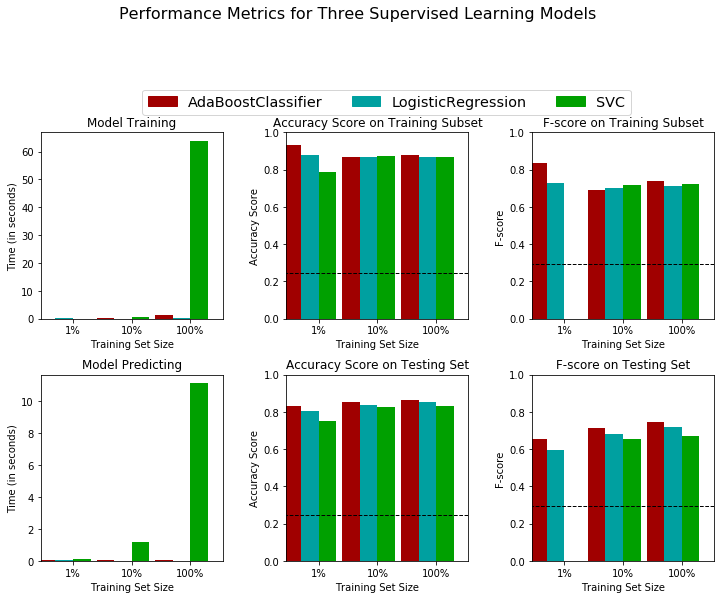

In [12]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
print(y_train)
print(X_train.columns)
print(X_train)
# TODO：初始化三个模型
# clf_A = AdaBoostClassifier()#(base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators = 4)#.fit(X_train, y_train)
# clf_B = LogisticRegression(random_state=0)#, solver='lbfgs',multi_class='multinomial')#.fit(X_train, y_train)
# clf_C = SVC()#(kernel = 'rbf', degree = None, gamma = None, C = None)#.fit(X_train, y_train)
#版本2： 设置random_state (如果有这个参数)=0
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0)
clf_C = SVC(random_state=0)


#X_train, X_val, y_train, y_val
# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(len(X_train)*0.01)
samples_10 = int(len(X_train)*0.1)
samples_100 = int(len(X_train)*1)


# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)



##
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  
在预测数据中存在实际类别没有的标签时报此warning

----
## 提高效果

在这最后一节中，您将从三个有监督的学习模型中选择 *最好的* 模型来使用学生数据。你将在整个训练集（`X_train`和`y_train`）上使用网格搜索优化至少调节一个参数以获得一个比没有调节之前更好的 F-score。

### 问题 3 - 选择最佳的模型

*基于你前面做的评价，用一到两段话向 *CharityML* 解释这三个模型中哪一个对于判断被调查者的年收入大于 \$50,000 是最合适的。*             
**提示：**你的答案应该包括评价指标，预测/训练时间，以及该算法是否适合这里的数据。

**回答：**AdaBoostClassifier
Fscore 说明了AdaBoostClassifier的精度更高一些（即判断符合条件的人中判断正确的比率最高）
预测/训练时间也较小
该算法适合这里的数据

### 问题 4 - 用通俗的话解释模型

*用一到两段话，向 *CharityML* 用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

**回答： ** 
AdaBoostClassifier 是通过构建并结合多个分类器来完成学习任务的方法。首先赋予每个训练的数据（元组）相应的重要程度（即权重），生成基分类器（功能简单的分类器，只能够划一条直线进行数据判断），用该分类器进行预测后更新被分类错误的训练数据的重要程度，再将训练数据和更新后的重要程度训练下一个功能也比较简单分类器……不断重复更新重要程度然后训练下一个功能简单的分类器这个过程，最后将这些功能简单的分类器结合在一起，变成一个功能复杂的整体准确率较高的分类器（合成后可以划曲线进行判断了）

**版本2：**
更加详细地描述的Adaboost的算法原理：
需要注意具体描述以下内容：1每次迭代过程是如何对待上一轮错误分类的样本（这一点你已经做了描述）; 2。弱分类器是如何融合成强分类器的; 3模型是如何做出预测的。

开始时，每个样本对应的权重是相同的，在此样本分布下训练出一弱分类器。对该权重的样本下的弱分类器进行如下训练操作：计算弱分类器的错误率；选取合适阈值，使得误差最小；更新样本权重：对于分类错误的样本，加大其对应的权重；而对于分类正确的样本，降低其权重，这样分错的样本就被突显出来，得到一个新的样本分布。在新的样本分布下，再次对样本进行训练，得到弱分类器。依次类推，经过 T 次循环，得到 T 个弱分类器，把这 T 个弱分类器按一定的权重叠加（boost）起来（即加权取和(weighted sum)），得到最终想要的强分类器。

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [19]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

# TODO：初始化分类器
clf = AdaBoostClassifier(random_state=0)

# TODO：创建你希望调节的参数列表
parameters = {'base_estimator' : [DecisionTreeClassifier(max_depth=5)], 'n_estimators' :[5]}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_fit = grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# 汇报调优后的模型
print ("best_clf\n------")
print (best_clf)

# 汇报调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))

best_clf
------
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=0)

Unoptimized model
------
Accuracy score on validation data: 0.8648
F-score on validation data: 0.7443

Optimized Model
------
Final accuracy score on the validation data: 0.8669
Final F-score on the validation data: 0.7541


- 网格搜索GridSearchCV是常用的自动调参的方法。

- 还有另一种比较好用的参数搜索方法叫做随机搜索，关于这两种方法的对比可以参考谁更胜一筹？ - 随机搜索VS网格搜索
https://www.jianshu.com/p/750443e2fea9?utm_source=oschina-app

- 没有理由假定网格搜索可能不优于随机搜索，因为随机地形可能在其中一个均匀布置的点下面具有其全局最小点，并且随机搜索可能错过该点。

### 问题 5 - 最终模型评估

_你的最优模型在测试数据上的准确率和 F-score 是多少？这些分数比没有优化的模型好还是差？_
**注意：**请在下面的表格中填写你的结果，然后在答案框中提供讨论。

#### 结果:
 
| 评价指标         |  未优化的模型        | 优化的模型        |
| :------------: |  :---------------: | :-------------: | 
| 准确率          |     0.8648               |      0.8669           |
| F-score        |     0.7443                |     0.7541            |

**回答：**

优化后的模型好了一些些（虽然感觉变得更复杂了，但是准确率和F0.5都能够高一些）

----
## 特征的重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。专注于少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

选择一个有 `'feature_importance_'` 属性的scikit学习分类器（例如 AdaBoost，随机森林）。`'feature_importance_'` 属性是对特征的重要性排序的函数。在下一个代码单元中用这个分类器拟合训练集数据并使用这个属性来决定人口普查数据中最重要的5个特征。

### 问题 6 - 观察特征相关性

当**探索数据**的时候，它显示在这个人口普查数据集中每一条记录我们有十三个可用的特征。             
_在这十三个记录中，你认为哪五个特征对于预测是最重要的，选择每个特征的理由是什么？你会怎样对他们排序？_

In [20]:
display(data[120:140])

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
120,28,Private,Assoc-acdm,12.0,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,60.0,United-States,<=50K
121,24,Private,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Female,0.0,1762.0,40.0,United-States,<=50K
122,38,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,4386.0,0.0,35.0,United-States,<=50K
123,37,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
124,46,Private,Assoc-acdm,12.0,Divorced,Tech-support,Not-in-family,Black,Female,0.0,0.0,36.0,United-States,<=50K
125,38,Federal-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,Iran,>50K
126,43,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
127,27,Private,Assoc-voc,11.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,35.0,United-States,<=50K
128,20,Private,Some-college,10.0,Never-married,Sales,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
129,49,Private,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,United-States,>50K


**回答：**
- 特征1:occupation : Prof-specialty或Exec-managerial
- 特征2:education-num ：>50K的人这特征数字更大
- 特征3:relationship : Husband更容易捐款
- 特征4:hours-per-week ：每周工作的时间越多理论上收入就会越多  >50K的人这特征数字基本>40
- 特征5:capital-gain : 拥有其他的资本收益  如果>5K,income 基本>50K

- 特征*:age : >50K的人都在30岁以上 ，理论上年龄增大后收入也会相应增大

**版本2：** 补充重要性排序：
`occupation`职业领域 > `education-num`在学校学习了多少年 > `relationship`家庭情况 >`hours-per-week`周工作时间 > `capital-gain`资本收益
猜想：某些职业会薪资会高一些，受教育程度越高的越容易捐赠，有家庭的尤其是丈夫这个角色更容易捐赠，工作时间越长一般越多钱，有资本收益的人收入越多越容易捐钱
通过目测得到的重要性排序并不怎么靠谱。

### 练习 - 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

**版本2**  补充：
计算特征重要性可以帮助我们更好地理解问题，并且避免过拟合。
这里是sklearn中用于特征选择的一些方法：特征选择。
sklearn.feature_selection模块中的类可用于样本集上的特征选择/降维，以提高估计者的准确度分数或提高其在非常高维数据集上的性能。

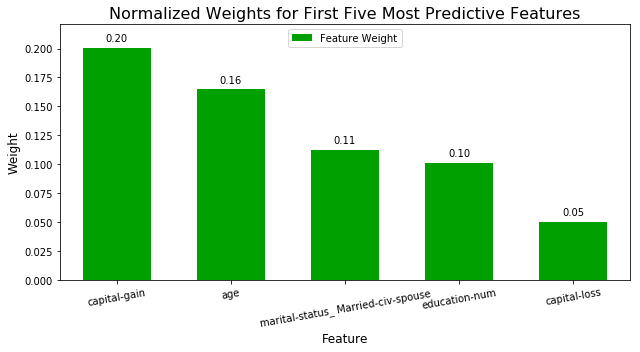

In [21]:
# TODO：导入一个有'feature_importances_'的监督学习模型
from sklearn.ensemble import RandomForestClassifier
# TODO：在训练集上训练一个监督学习模型
model = best_clf


# # TODO：初始化分类器
# clfR = RandomForestClassifier(random_state=0)

# # TODO：创建你希望调节的参数列表
# parametersR = {'n_estimators':[10,50,100,150]}

# # TODO：创建一个fbeta_score打分对象
# scorerR = make_scorer(fbeta_score, beta=0.5)

# # TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
# grid_objR = GridSearchCV(clf, parameters,scorer)

# # TODO：用训练数据拟合网格搜索对象并找到最佳参数
# grid_objR = grid_obj.fit(X_train, y_train)
# # 得到estimator
# best_clfR = grid_obj.best_estimator_
# best_predictionsR = best_clf.predict(X_val)

# model = best_clfR




# TODO： 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

### 问题 7 - 提取特征重要性
观察上面创建的展示五个用于预测被调查者年收入是否大于\$50,000最相关的特征的可视化图像。

_这五个特征的权重加起来是否超过了0.5?_<br>
_这五个特征和你在**问题 6**中讨论的特征比较怎么样？_<br>
_如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？_<br>
_如果你的选择不相近，那么为什么你觉得这些特征更加相关？_

**回答：**

1 超过了，加起来0.6_<br>
2 婚宴状况我没有预测到，年龄比我想象的占的权重还要大_<br>
3 不相近，因为我只目测了部分我抽查的数据来看_<br>

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去**减小特征空间**，简化模型需要学习的信息。下面代码单元将使用你前面发现的优化模型，并**只使用五个最重要的特征**在相同的训练集上训练模型。

In [22]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 在前面的网格搜索的基础上训练一个“最好的”模型
clf_on_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)

# 做一个新的预测
reduced_predictions = clf_on_reduced.predict(X_val_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print ("Final Model trained on full data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, reduced_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on validation data: 0.8669
F-score on validation data: 0.7541

Final Model trained on reduced data
------
Accuracy on validation data: 0.8624
F-score on validation data: 0.7399


### 问题 8 - 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的 F-score 和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

**回答：**

如果只考虑占用权重大的特征值来进行预测的话，预测准确率比全部特征都用上的模型稍微低了一点点，但也算比较高的了_<br>
我会考虑使用部分特征的数据作为你的训练集，这样能大大增加效率

### 问题 9 - 在测试集上测试你的模型

终于到了测试的时候，记住，测试集只能用一次。

*使用你最有信心的模型，在测试集上测试，计算出准确率和 F-score。*
*简述你选择这个模型的原因，并分析测试结果*

In [23]:
#TODO test your model on testing data and report accuracy and F score
res = best_clf.predict(X_test)
#0.858706467662
#0.736071349923
#res = clf.predict(X_test)
#0.85903814262
#0.73276776246
print (accuracy_score(y_true=y_test,y_pred=res))
print (fbeta_score(y_true=y_test,y_pred=res,beta=0.5))


0.8588170259812051
0.7361996921046844


> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。